In [81]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [82]:
# Hàm K-means chung cho cả ba bài tập
def kmeans(X, k=3, max_iters=100, tol=1e-4):
    n_samples, n_features = X.shape
    # Khởi tạo ngẫu nhiên tâm cụm
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    
    for iteration in range(max_iters):
        # E-step: Gán điểm vào cụm gần nhất
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # M-step: Cập nhật tâm cụm
        new_centroids = np.zeros_like(centroids)
        for i in range(k):
            if np.sum(labels == i) > 0:
                new_centroids[i] = X[labels == i].mean(axis=0)
            else:
                new_centroids[i] = centroids[i]  # Giữ tâm cũ nếu cụm rỗng
        
        # Kiểm tra hội tụ
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    
    return centroids, labels

# Hàm tính inertia để đánh giá chất lượng cụm
def compute_inertia(X, centroids, labels):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids[labels], axis=2)
    return np.sum(distances**2)

# Hàm trực quan hóa kết quả phân cụm
def plot_clusters(X, centroids, labels, title, filename=None):
    fig, ax = plt.subplots(figsize=(7, 6))
    unique_labels = np.unique(labels)
    colors = plt.get_cmap("Set1", len(unique_labels))

    for i in unique_labels:
        ax.scatter(X[labels == i][:, 0], X[labels == i][:, 1], 
                   s=40, alpha=0.9, label=f"Cụm {i+1}", color=colors(i))
    
    if centroids is not None:
        ax.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=120, 
                   label='Tâm cụm')

    ax.set_title(title)
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    if filename:
        plt.savefig(filename)
    plt.show()


## Bài 1

In [83]:
# Tạo tập dữ liệu cho Bài 1
Sigma1 = np.array([[1, 0], [0, 1]])
clusters = [
    (200, [2, 2], Sigma1),
    (200, [8, 3], Sigma1),
    (200, [3, 6], Sigma1)
]
X1 = np.vstack([np.random.multivariate_normal(mean, cov, n) for n, mean, cov in clusters])

In [84]:
# Huấn luyện K-means
centroids1, labels1 = kmeans(X1, k=3)

In [85]:
# Đánh giá hiệu suất
inertia1 = compute_inertia(X1, centroids1, labels1)
print(f"Bài 1 - Inertia: {inertia1:.2f}")

Bài 1 - Inertia: 7574658.07


In [86]:
# Chạy nhiều lần để đánh giá khởi tạo ngẫu nhiên
n_runs = 10
inertias1 = []
for _ in range(n_runs):
    centroids, labels = kmeans(X1, k=3)
    inertias1.append(compute_inertia(X1, centroids, labels))
print(f"Bài 1 - Inertia trung bình: {np.mean(inertias1):.2f}, độ lệch chuẩn: {np.std(inertias1):.2f}")

Bài 1 - Inertia trung bình: 7275503.78, độ lệch chuẩn: 456989.82


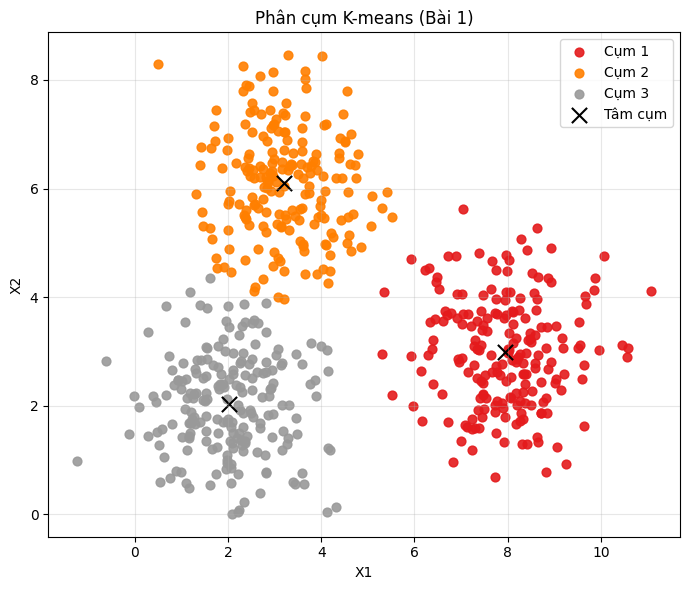

In [87]:
# Trực quan hóa
plot_clusters(X1, centroids1, labels1, 
              "Phân cụm K-means (Bài 1)", 
              "kmeans_assignment1.png")

Bình luận về khởi tạo tâm cụm ngẫu nhiên (Bài 1):
- Khởi tạo ngẫu nhiên có thể khiến K-means hội tụ đến cực trị địa phương, do hàm mục tiêu inertia không lồi.
- Trong tập dữ liệu này, các cụm tách biệt tốt (trung bình tại [2,2], [8,3], [3,6], phương sai đơn vị), nên khởi tạo ngẫu nhiên thường cho kết quả khả quan. Tuy nhiên, độ lệch chuẩn inertia (456989.82) cho thấy sự biến thiên đáng kể, phản ánh sự không ổn định ở một số lần chạy.
- Độ lệch chuẩn cao (so với trung bình 7275503.78) cho thấy thuật toán nhạy cảm với khởi tạo ngẫu nhiên, dù các cụm tách biệt.
- Cách cải thiện: Chạy nhiều lần và chọn inertia thấp nhất, sử dụng K-means++ để đặt tâm xa nhau, hoặc khởi tạo tâm gần [2,2], [8,3], [3,6] dựa trên kiến thức miền.

## Bài 2

In [88]:
clusters = [
    (50, [2, 2], Sigma1),
    (20, [8, 3], Sigma1),
    (1000, [3, 6], Sigma1)
]
X2 = np.vstack([np.random.multivariate_normal(mean, cov, n) for n, mean, cov in clusters])

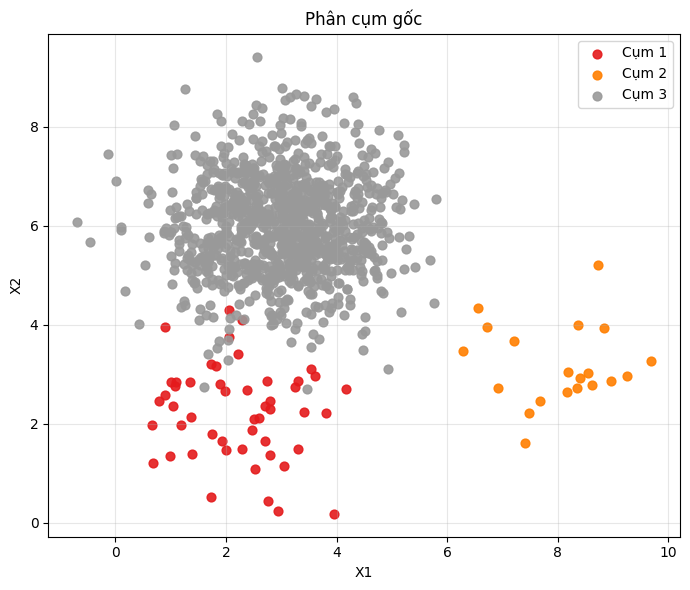

In [89]:
plot_clusters(X2, centroids=None, labels=original_label, 
              title="Phân cụm gốc", filename="original_clusters.png")

In [90]:
# Huấn luyện K-means
centroids2, labels2 = kmeans(X2, k=3)

In [91]:
# Đánh giá hiệu suất
inertia2 = compute_inertia(X2, centroids2, labels2)
print(f"Bài 2 - Inertia: {inertia2:.2f}")

Bài 2 - Inertia: 5501394.17


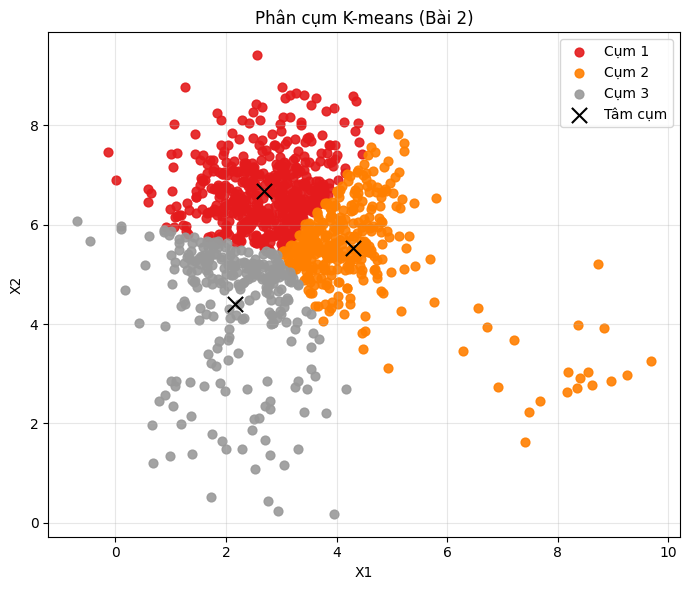

Bài 2 - Inertia trung bình: 5500205.35, độ lệch chuẩn: 9287.00


In [92]:
# Chạy nhiều lần để đánh giá độ ổn định# Trực quan hóa
plot_clusters(X2, centroids2, labels2, 
              "Phân cụm K-means (Bài 2)", 
              "kmeans_assignment2.png")
inertias2 = []
for _ in range(n_runs):
    centroids, labels = kmeans(X2, k=3)
    inertias2.append(compute_inertia(X2, centroids, labels))
print(f"Bài 2 - Inertia trung bình: {np.mean(inertias2):.2f}, độ lệch chuẩn: {np.std(inertias2):.2f}")

Nhận xét về kích thước cụm khác nhau (Bài 2):
- Cụm không cân bằng: 50 ([2,2]), 20 ([8,3]), 1000 ([3,6]) điểm.
- K-means ưu tiên cụm lớn (1000 điểm, ~93.5%), đặt tâm gần [3,6]. Cụm nhỏ nhất ([8,3], 20 điểm) đã bị gộp sai vào cụm lớn, như thấy trên biểu đồ khi không có cụm nào gần [8,3].
- Độ lệch chuẩn inertia (9287.00) rất thấp so với trung bình (5500205.35), cho thấy thuật toán ổn định qua các lần chạy, nhưng không đảm bảo phát hiện đúng các cụm nhỏ.
- Cách cải thiện: Dùng K-means++ để khởi tạo tâm xa nhau, chạy nhiều lần và chọn inertia thấp nhất, hoặc dùng thuật toán như DBSCAN (dựa trên mật độ) hoặc GMM (mô hình Gaussian) để xử lý tốt hơn cụm không cân bằng.

## Bài 3

In [93]:
# Tạo tập dữ liệu
Sigma2 = np.array([[10, 0], [0, 1]])
clusters = [
    (200, [2, 2], Sigma1),
    (200, [8, 3], Sigma1),
    (200, [3, 6], Sigma2)
]
X3 = np.vstack([np.random.multivariate_normal(mean, cov, n) for n, mean, cov in clusters])

In [94]:
# Huấn luyện K-means
centroids3, labels3 = kmeans(X3, k=3)

In [95]:
# Đánh giá hiệu suất
inertia3 = compute_inertia(X3, centroids3, labels3)
print(f"Bài 3 - Inertia: {inertia3:.2f}")

Bài 3 - Inertia: 9087937.21


In [96]:
# Chạy nhiều lần để đánh giá độ ổn định
inertias3 = []
for _ in range(n_runs):
    centroids, labels = kmeans(X3, k=3)
    inertias3.append(compute_inertia(X3, centroids, labels))
print(f"Bài 3 - Inertia trung bình: {np.mean(inertias3):.2f}, độ lệch chuẩn: {np.std(inertias3):.2f}")

Bài 3 - Inertia trung bình: 9087943.29, độ lệch chuẩn: 3.04


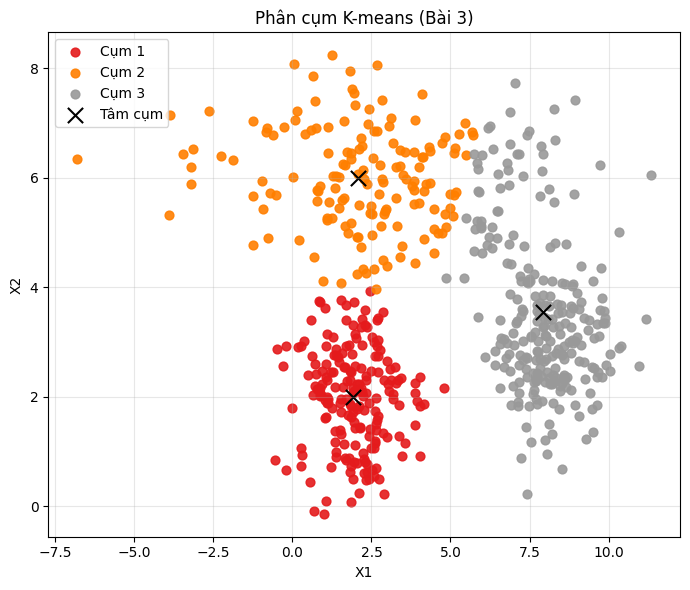

In [97]:
# Trực quan hóa
plot_clusters(X3, centroids3, labels3, 
              "Phân cụm K-means (Bài 3)", 
              "kmeans_assignment3.png")

Nhận xét  về phân phối N((3,6), Sigma_2) (Bài 3):
- Cụm N((3,6), Sigma_2) có phương sai lớn ở X1 (10 so với 1), tạo hình elip dẹt, phân tán rộng theo trục X1.
- K-means giả định cụm hình cầu, nên khó xử lý cụm này, dễ gộp sai với cụm [2,2] (gần nhau, khoảng cách ~4.12).
- Inertia lớn hơn và biến thiên nhiều hơn (xem độ lệch chuẩn) so với Bài 1.
- Nhạy với khởi tạo: Tâm xa [3,6] có thể làm cụm bị chia sai.
- Cách cải thiện: Dùng K-means++, chạy nhiều lần, hoặc dùng GMM cho cụm có hiệp phương sai khác nhau.